<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>12.- EDA - Exploratory Data Analysis Analysis</font>

## <font color='steelblue'>Tasks</font>

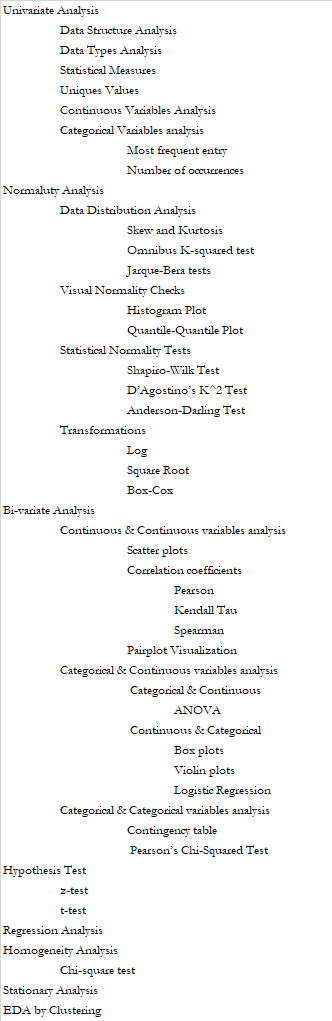
    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_CTYPE=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8;LC_COLLATE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=es_ES.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=es_ES.UTF-8;LC_IDENTIFICATION=C"

## <font color='green'>Settings</font>

### Libraries to use

In [2]:
library(readr)
library(dplyr)
library(sf)
library(tidyr)
library(ggplot2)
library(summarytools)
library(GGally)
library(nortest)
library(lubridate)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Linking to GEOS 3.11.1, GDAL 3.6.2, PROJ 6.2.1; sf_use_s2() is TRUE


Linked against: 3.11.1-CAPI-1.17.1 compiled against: 3.8.0-CAPI-1.13.1

It is probably a good idea to reinstall sf, and maybe rgeos and rgdal too

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [5]:
iFile <- "CU_34_11_05_servicios_completo.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_34_11_05_servicios_completo.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [6]:
data <- read_csv(file_data)

Rows: 272862 Columns: 19
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr   (5): Servicio, CMUN, CDIS, CSEC, NSEC
dbl  (12): Futbol, nservicios, capacidad, tmed, prec, velmedia, presMax, t1_...
lgl   (1): is_train
date  (1): Fecha

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Structure

Estructura de  los datos:

In [7]:
data |> glimpse()

Rows: 272,862
Columns: 19
$ Fecha            <date> 2022-01-12, 2022-01-31, 2022-01-28, 2022-01-06, 2022…
$ Servicio         <chr> "Delivery", "Taxi", "Taxi", "Delivery", "Delivery", "…
$ CMUN             <chr> "079", "079", "903", "079", "007", "022", "079", "079…
$ CDIS             <chr> "14", "01", "01", "04", "04", "01", "16", "01", "16",…
$ CSEC             <chr> "050", "048", "006", "080", "012", "004", "041", "033…
$ Futbol           <dbl> 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ nservicios       <dbl> 58, 5, 0, 14, 60, 50, 13, 4, 3, 9, 68, 12, 0, 1, 14, …
$ capacidad        <dbl> 80, 69, 56, 80, 70, 56, 80, 69, 69, 69, 80, 80, 69, 6…
$ tmed             <dbl> 7.366319, 8.823406, 7.854915, 4.226603, 4.982656, 7.2…
$ prec             <dbl> -0.009468616, 0.000000000, 0.000000000, 0.010181896, …
$ velmedia         <dbl> 1.5999961, 1.5114967, 2.2536168, 1.0279945, 1.0387037…
$ presMax          <dbl> 954.7939, 948.9795, 940.2553, 945.1884, 948.9570, 943…
$ t1_1        

Muestra de los primeros datos:

In [8]:
data |> slice_head(n = 5)

Fecha,Servicio,CMUN,CDIS,CSEC,Futbol,nservicios,capacidad,tmed,prec,velmedia,presMax,t1_1,t3_1,NSEC,area,elevation,densidad_hab_km2,is_train
<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
2022-01-12,Delivery,079,14,050,1,58,80,7.366319,-0.009468616,1.599996,954.7939,1094,45.4360,Madrid - 14.050,38753.96,658,28229.374,TRUE
2022-01-31,Taxi,079,01,048,0,5,69,8.823406,0.000000000,1.511497,948.9795,1251,41.6091,Madrid - 01.048,15289.89,635,81818.774,TRUE
2022-01-28,Taxi,903,01,006,0,0,56,7.854915,0.000000000,2.253617,940.2553,2232,44.2016,Tres Cantos - 01.006,124539.78,719,17921.984,TRUE
2022-01-06,Delivery,079,04,080,0,14,80,4.226603,0.010181896,1.027994,945.1884,746,47.1729,Madrid - 04.080,89206.78,710,8362.593,TRUE
2022-01-21,Delivery,007,04,012,1,60,70,4.982656,0.000000000,1.038704,948.9570,1080,48.5361,Alcorcón - 04.012,24473.30,693,44129.730,TRUE


**Tamaño de Memoria** de los datos

In [9]:
object.size(data)

40731944 bytes

**Structure of non-numerical features**

In [10]:
# Display non-numerical features
data |> select(where(~ !is.numeric(.x))) |> freq()

Variable(s) ignored: Fecha



,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
Delivery,136431,50,50,50,50
Taxi,136431,50,100,50,100
<NA>,0,NA,NA,0,100
Total,272862,100,100,100,100
,Freq,% Valid,% Valid Cum.,% Total,% Total Cum.
002,124,0.04544422,0.04544422,0.04544422,0.04544422
003,62,0.02272211,0.06816633,0.02272211,0.06816633
004,248,0.09088843,0.15905476,0.09088843,0.15905476
005,7750,2.84026358,2.99931834,2.84026358,2.99931834
006,4092,1.49965917,4.49897751,1.49965917,4.49897751


**Structure of numerical features**

In [11]:
data |> select(where(is.numeric)) |> descr()


,area,capacidad,densidad_hab_km2,elevation,Futbol,nservicios,prec,presMax,t1_1,t3_1,tmed,velmedia
Mean,1.773638e+06,6.934424e+01,2.694664e+04,6.710193e+02,1.886595e-01,1.613602e+01,4.801344e-01,9.511566e+02,1.526734e+03,4.341563e+01,6.490691e+00,1.834992e+00
Std.Dev,8.135112e+06,8.082869e+00,2.003986e+04,8.656152e+01,3.912386e-01,2.040071e+01,1.856941e+00,1.716465e+01,6.213106e+02,4.609507e+00,2.372064e+00,1.047341e+00
Min,7.404143e+03,5.000000e+01,3.840141e+00,4.590000e+02,0.000000e+00,0.000000e+00,-1.187915e+00,8.202732e+02,1.060000e+02,2.686980e+01,-5.046941e+00,-1.093687e+00
Q1,2.963574e+04,6.400000e+01,9.545095e+03,6.300000e+02,0.000000e+00,3.000000e+00,0.000000e+00,9.471724e+02,1.084000e+03,4.098250e+01,4.734351e+00,1.217638e+00
Median,5.509161e+04,6.900000e+01,2.524896e+04,6.630000e+02,0.000000e+00,8.000000e+00,0.000000e+00,9.516173e+02,1.398000e+03,4.382120e+01,6.228203e+00,1.599999e+00
Q3,1.742421e+05,8.000000e+01,4.149213e+04,6.890000e+02,0.000000e+00,1.500000e+01,0.000000e+00,9.564518e+02,1.847000e+03,4.648500e+01,8.314273e+00,2.072737e+00
Max,1.808169e+08,8.000000e+01,1.165063e+05,1.507000e+03,1.000000e+00,8.000000e+01,2.267221e+01,1.022607e+03,5.711000e+03,6.379980e+01,1.380816e+01,1.238568e+01
MAD,4.874931e+04,7.413000e+00,2.365104e+04,4.299540e+01,0.000000e+00,8.895600e+00,0.000000e+00,6.869842e+00,5.367012e+02,4.080857e+00,2.559183e+00,6.214933e-01
IQR,1.446064e+05,1.600000e+01,3.194704e+04,5.900000e+01,0.000000e+00,1.200000e+01,0.000000e+00,9.279250e+00,7.630000e+02,5.502500e+00,3.579915e+00,8.550858e-01
CV,4.586682e+00,1.165615e-01,7.436870e-01,1.290000e-01,2.073782e+00,1.264296e+00,3.867543e+00,1.804609e-02,4.069541e-01,1.061716e-01,3.654563e-01,5.707605e-01


## Data Types

**Tipo** de datos

In [12]:
sapply(data, class)
glimpse(data)

Fecha         Servicio             CMUN             CDIS 
          "Date"      "character"      "character"      "character" 
            CSEC           Futbol       nservicios        capacidad 
     "character"        "numeric"        "numeric"        "numeric" 
            tmed             prec         velmedia          presMax 
       "numeric"        "numeric"        "numeric"        "numeric" 
            t1_1             t3_1             NSEC             area 
       "numeric"        "numeric"      "character"        "numeric" 
       elevation densidad_hab_km2         is_train 
       "numeric"        "numeric"        "logical"

Rows: 272,862
Columns: 19
$ Fecha            <date> 2022-01-12, 2022-01-31, 2022-01-28, 2022-01-06, 2022…
$ Servicio         <chr> "Delivery", "Taxi", "Taxi", "Delivery", "Delivery", "…
$ CMUN             <chr> "079", "079", "903", "079", "007", "022", "079", "079…
$ CDIS             <chr> "14", "01", "01", "04", "04", "01", "16", "01", "16",…
$ CSEC             <chr> "050", "048", "006", "080", "012", "004", "041", "033…
$ Futbol           <dbl> 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ nservicios       <dbl> 58, 5, 0, 14, 60, 50, 13, 4, 3, 9, 68, 12, 0, 1, 14, …
$ capacidad        <dbl> 80, 69, 56, 80, 70, 56, 80, 69, 69, 69, 80, 80, 69, 6…
$ tmed             <dbl> 7.366319, 8.823406, 7.854915, 4.226603, 4.982656, 7.2…
$ prec             <dbl> -0.009468616, 0.000000000, 0.000000000, 0.010181896, …
$ velmedia         <dbl> 1.5999961, 1.5114967, 2.2536168, 1.0279945, 1.0387037…
$ presMax          <dbl> 954.7939, 948.9795, 940.2553, 945.1884, 948.9570, 943…
$ t1_1        

## Statistical Measures

In [13]:
data  |> descr()

,area,capacidad,densidad_hab_km2,elevation,Futbol,nservicios,prec,presMax,t1_1,t3_1,tmed,velmedia
Mean,1.773638e+06,6.934424e+01,2.694664e+04,6.710193e+02,1.886595e-01,1.613602e+01,4.801344e-01,9.511566e+02,1.526734e+03,4.341563e+01,6.490691e+00,1.834992e+00
Std.Dev,8.135112e+06,8.082869e+00,2.003986e+04,8.656152e+01,3.912386e-01,2.040071e+01,1.856941e+00,1.716465e+01,6.213106e+02,4.609507e+00,2.372064e+00,1.047341e+00
Min,7.404143e+03,5.000000e+01,3.840141e+00,4.590000e+02,0.000000e+00,0.000000e+00,-1.187915e+00,8.202732e+02,1.060000e+02,2.686980e+01,-5.046941e+00,-1.093687e+00
Q1,2.963574e+04,6.400000e+01,9.545095e+03,6.300000e+02,0.000000e+00,3.000000e+00,0.000000e+00,9.471724e+02,1.084000e+03,4.098250e+01,4.734351e+00,1.217638e+00
Median,5.509161e+04,6.900000e+01,2.524896e+04,6.630000e+02,0.000000e+00,8.000000e+00,0.000000e+00,9.516173e+02,1.398000e+03,4.382120e+01,6.228203e+00,1.599999e+00
Q3,1.742421e+05,8.000000e+01,4.149213e+04,6.890000e+02,0.000000e+00,1.500000e+01,0.000000e+00,9.564518e+02,1.847000e+03,4.648500e+01,8.314273e+00,2.072737e+00
Max,1.808169e+08,8.000000e+01,1.165063e+05,1.507000e+03,1.000000e+00,8.000000e+01,2.267221e+01,1.022607e+03,5.711000e+03,6.379980e+01,1.380816e+01,1.238568e+01
MAD,4.874931e+04,7.413000e+00,2.365104e+04,4.299540e+01,0.000000e+00,8.895600e+00,0.000000e+00,6.869842e+00,5.367012e+02,4.080857e+00,2.559183e+00,6.214933e-01
IQR,1.446064e+05,1.600000e+01,3.194704e+04,5.900000e+01,0.000000e+00,1.200000e+01,0.000000e+00,9.279250e+00,7.630000e+02,5.502500e+00,3.579915e+00,8.550858e-01
CV,4.586682e+00,1.165615e-01,7.436870e-01,1.290000e-01,2.073782e+00,1.264296e+00,3.867543e+00,1.804609e-02,4.069541e-01,1.061716e-01,3.654563e-01,5.707605e-01


## Uniques values

In [14]:
# Rthe number of unique values in each column.
data |> summarise(across(everything(), n_distinct))

Fecha,Servicio,CMUN,CDIS,CSEC,Futbol,nservicios,capacidad,tmed,prec,velmedia,presMax,t1_1,t3_1,NSEC,area,elevation,densidad_hab_km2,is_train
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
31,2,171,21,221,2,62,24,136406,39601,136078,136431,1861,4337,4401,4401,334,4401,2


## CrossTab

<font color='tomato'>Select columns</font>


Hacer los cruces que tengan sentido

In [15]:
data |> select(where(~ !is.numeric(.x))) |> colnames()
Column1 <- "Fecha"
Column2 <- "Servicio"

[1] "Fecha"    "Servicio" "CMUN"     "CDIS"     "CSEC"     "NSEC"     "is_train"

<font color='darkgrey'><b>Operation</font>

In [16]:
# Referencia cruzada de variables
ctable(data[[Column1]], data[[Column2]])

,Delivery,Taxi,Total
2022-01-01,4401,4401,8802
2022-01-02,4401,4401,8802
2022-01-03,4401,4401,8802
2022-01-04,4401,4401,8802
2022-01-05,4401,4401,8802
2022-01-06,4401,4401,8802
2022-01-07,4401,4401,8802
2022-01-08,4401,4401,8802
2022-01-09,4401,4401,8802
2022-01-10,4401,4401,8802


##	Analyzing Numerical Variables 

### Selecting continuous variables

In [17]:
# Numeric colums
cdata <- data |> select(where(is.numeric))

### Global view of the numerical variables

Global view on the dataset to identify some very unusual patterns.

NOTA: Esto puede tardar si hay muchas variables

In [18]:
#pairs(cdata)
# cdata |> ggpairs()

### Histograms

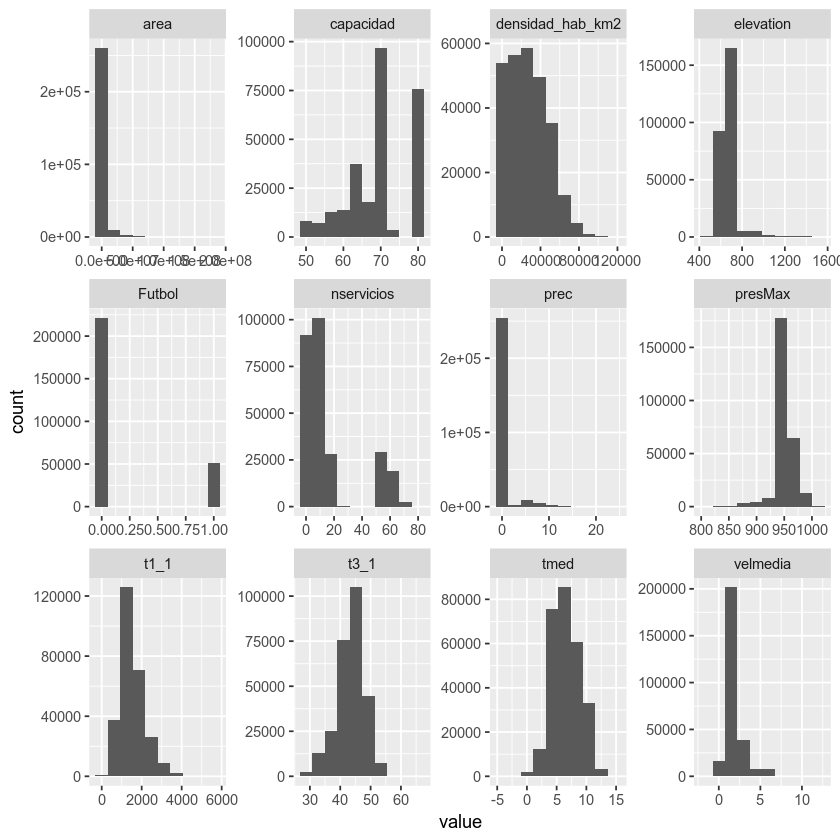

In [19]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_histogram(bins = 10) +
  facet_wrap(~name, scales = "free")

### Box plot 

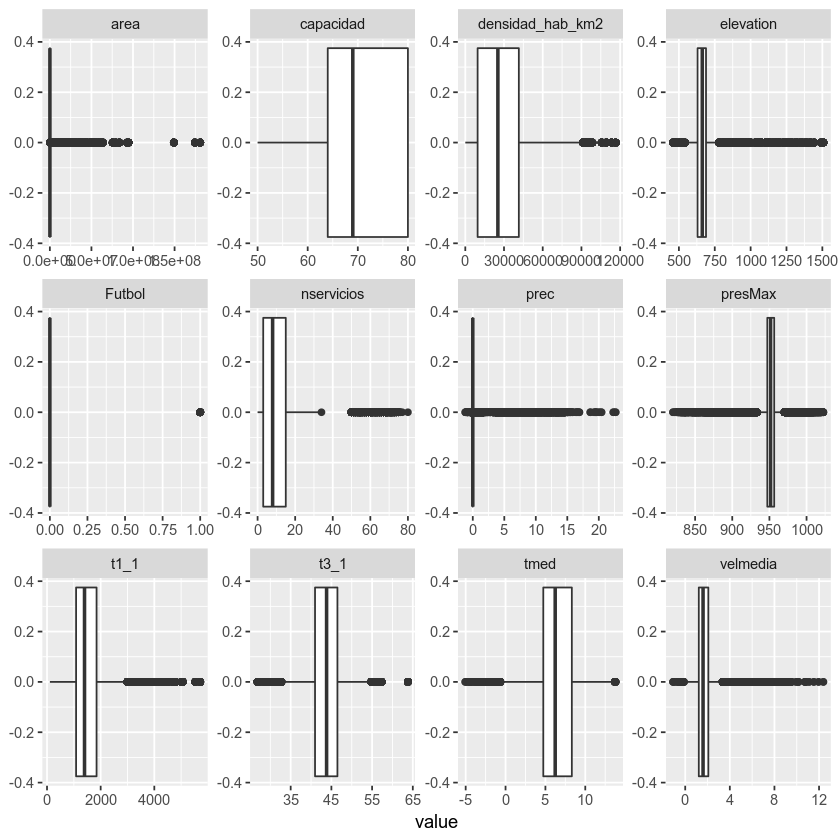

In [20]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_boxplot() +
  facet_wrap(~name, scales = "free")

### Violin plot 

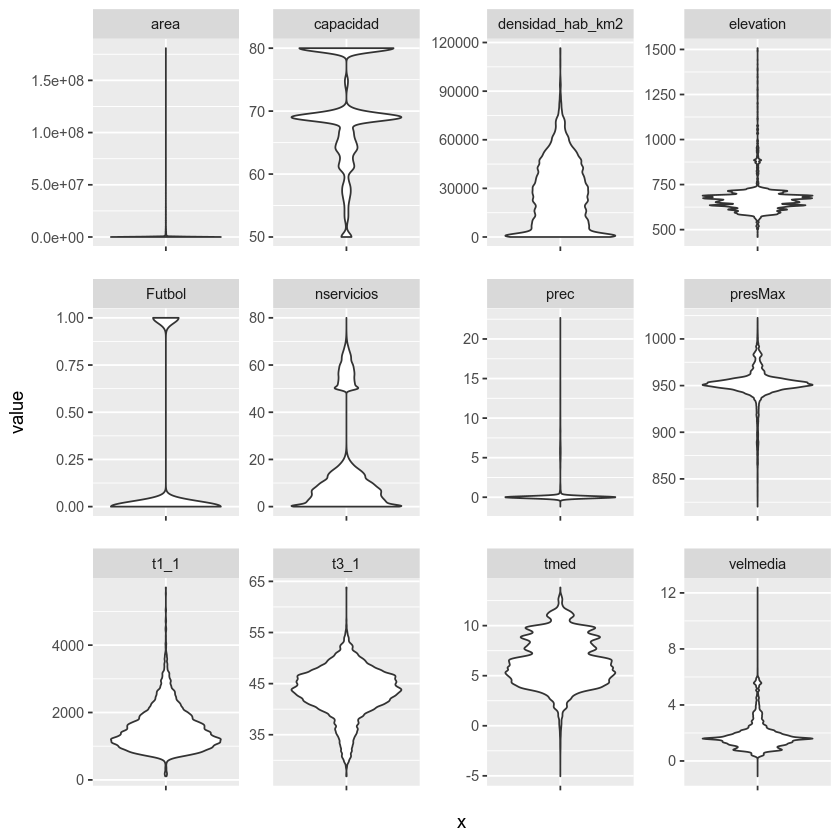

In [21]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = "", y = value)) +
  geom_violin() +
  facet_wrap(~name, scales = "free")

### Distribution plot 

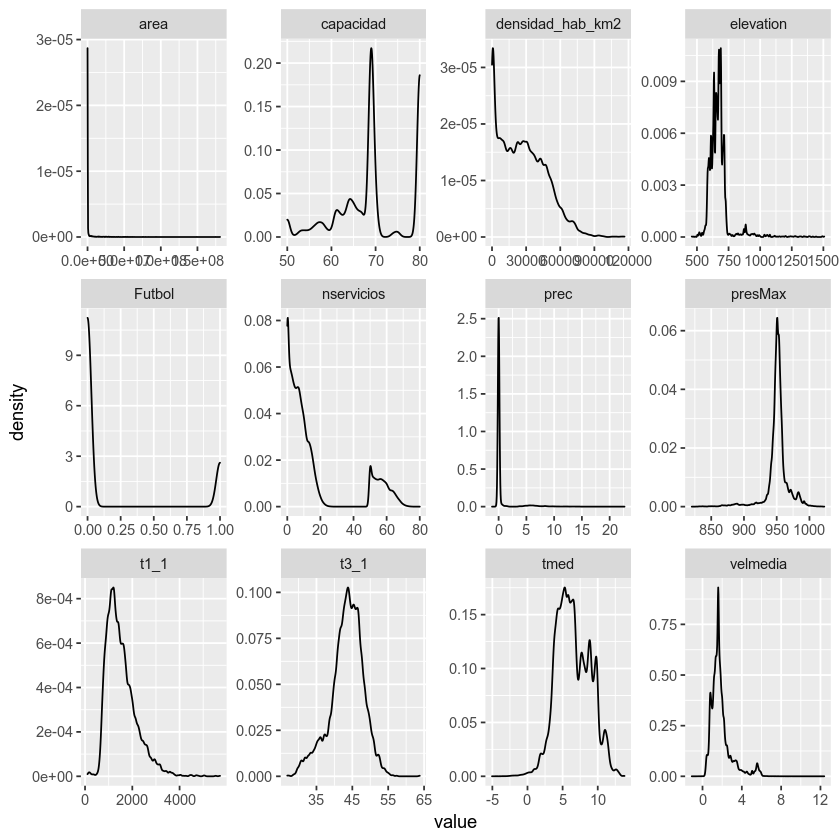

In [22]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_density() +
  facet_wrap(~name, scales = "free")

##	Analyzing Categorical Variables 

### Selecting categorical variables

In [23]:
# Category colums
char_cols <- data |> select(where(~ !is.numeric(.x))) |> colnames()
char_cols

[1] "Fecha"    "Servicio" "CMUN"     "CDIS"     "CSEC"     "NSEC"     "is_train"

In [24]:
# Category colums
char_data <- data |> select(where(~ !is.numeric(.x)))
char_data <- char_data[,!names(char_data) %in% c("Fecha", "is_train")]
char_data

Servicio,CMUN,CDIS,CSEC,NSEC
<chr>,<chr>,<chr>,<chr>,<chr>
Delivery,079,14,050,Madrid - 14.050
Taxi,079,01,048,Madrid - 01.048
Taxi,903,01,006,Tres Cantos - 01.006
Delivery,079,04,080,Madrid - 04.080
Delivery,007,04,012,Alcorcón - 04.012
Taxi,022,01,004,Boadilla del Monte - 01.004
Delivery,079,16,041,Madrid - 16.041
Taxi,079,01,033,Madrid - 01.033
Taxi,079,16,108,Madrid - 16.108


### Most frequent entry

* Ver salida de `summarytools::freq()` arriba

In [25]:
# Calculate and visualizate the ratio of the most frequent entry for each feature


### Visualization of categorical variables

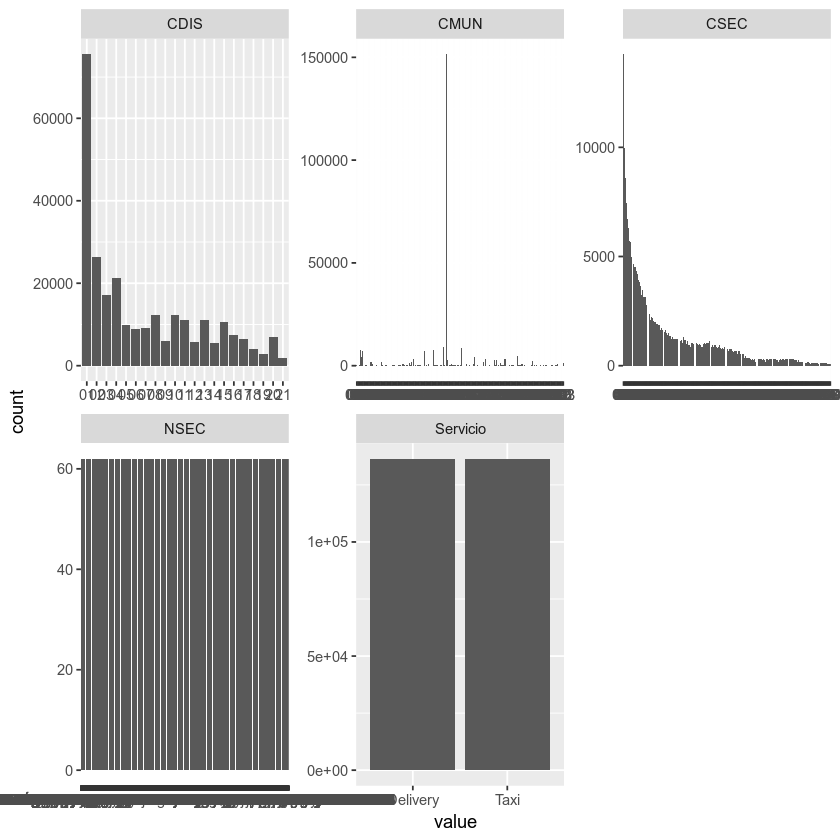

In [26]:
# returns a visualization of the number and frequency of categorical features
char_data |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(x = value)) +
  geom_bar() +
  facet_wrap(~name, scales = "free")

## Statistical Normality Tests

In [27]:
cdata_long <- cdata |> 
  pivot_longer(cols = everything())

### Test de Shapiro-Wilk

Si hay muchos datos este no se puede hacer



In [28]:
#tapply(cdata_long$value, cdata_long$name, shapiro.test)

### Test de Anderson-Darling



In [29]:
tapply(cdata_long$value, cdata_long$name, ad.test)

$area

	Anderson-Darling normality test

data:  X[[i]]
A = 80340, p-value < 2.2e-16


$capacidad

	Anderson-Darling normality test

data:  X[[i]]
A = 11050, p-value < 2.2e-16


$densidad_hab_km2

	Anderson-Darling normality test

data:  X[[i]]
A = 2833.2, p-value < 2.2e-16


$elevation

	Anderson-Darling normality test

data:  X[[i]]
A = 19128, p-value < 2.2e-16


$Futbol

	Anderson-Darling normality test

data:  X[[i]]
A = 74480, p-value < 2.2e-16


$nservicios

	Anderson-Darling normality test

data:  X[[i]]
A = 35080, p-value < 2.2e-16


$prec

	Anderson-Darling normality test

data:  X[[i]]
A = 86614, p-value < 2.2e-16


$presMax

	Anderson-Darling normality test

data:  X[[i]]
A = 17182, p-value < 2.2e-16


$t1_1

	Anderson-Darling normality test

data:  X[[i]]
A = 5041.6, p-value < 2.2e-16


$t3_1

	Anderson-Darling normality test

data:  X[[i]]
A = 1680.9, p-value < 2.2e-16


$tmed

	Anderson-Darling normality test

data:  X[[i]]
A = 1191, p-value < 2.2e-16


$velmedia

	Anderso

### Test de Lilliefors



In [30]:
tapply(cdata_long$value, cdata_long$name, lillie.test)

$area

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.42034, p-value < 2.2e-16


$capacidad

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.18547, p-value < 2.2e-16


$densidad_hab_km2

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.0894, p-value < 2.2e-16


$elevation

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.21372, p-value < 2.2e-16


$Futbol

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.49651, p-value < 2.2e-16


$nservicios

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.27719, p-value < 2.2e-16


$prec

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.46853, p-value < 2.2e-16


$presMax

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.18147, p-value < 2.2e-16


$t1_1

	Lilliefors (Kolmogorov-Smirnov) normality test

data:  X[[i]]
D = 0.088341, p-value < 2.2e-16


$t3_1

	Lilliefors (Kolmogorov-Smirnov) 

### QQ-plots

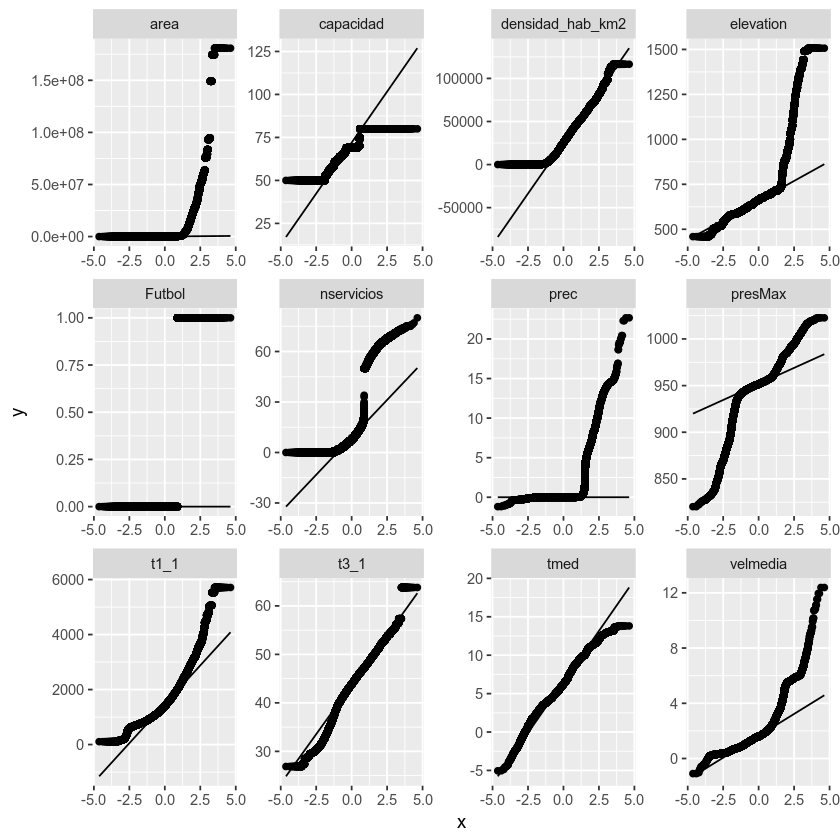

In [31]:
cdata |>
  pivot_longer(cols = everything()) |> 
  ggplot(aes(sample = value)) +
  geom_qq() +
  geom_qq_line() +
  facet_wrap(~name, scales = "free")

## Bivariate analysis

* Ver gráficos de dispersión y ggpairs arriba
* Completar si es necesario con alguna comparación específica (gráfico de dispersión o boxplot por grupos)

Correlaciones

In [32]:
cor(cdata, use = "pairwise.complete.obs")

,Futbol,nservicios,capacidad,tmed,prec,velmedia,presMax,t1_1,t3_1,area,elevation,densidad_hab_km2
Futbol,1.0000000000,0.965537900,0.01695169,0.0120379536,0.010093926,0.002787198,-0.0020373676,0.0006808222,-0.002189486,-0.0002523514,-0.0001096484,0.001938311
nservicios,0.9655379005,1.000000000,0.18569366,0.0299971395,0.010773351,-0.005490080,-0.0156233952,-0.0263836111,0.023409098,-0.0336262132,-0.0056185541,0.084518064
capacidad,0.0169516892,0.185693656,1.00000000,0.1898186150,-0.012421143,-0.083216104,0.0398299266,-0.2965090406,0.246628395,-0.3255294454,-0.2368226699,0.366016314
tmed,0.0120379536,0.029997139,0.18981861,1.0000000000,0.042604067,-0.002143247,-0.0007697094,-0.1180439751,0.094774518,-0.1024089989,-0.1210573259,0.137233071
prec,0.0100939261,0.010773351,-0.01242114,0.0426040672,1.000000000,0.334580172,-0.1517840469,0.0114328210,-0.009834155,0.0133232906,0.0269962790,-0.019160708
velmedia,0.0027871981,-0.005490080,-0.08321610,-0.0021432471,0.334580172,1.000000000,-0.1993680461,0.0597336228,-0.041343375,0.0327770167,0.1040645174,-0.054596381
presMax,-0.0020373676,-0.015623395,0.03982993,-0.0007697094,-0.151784047,-0.199368046,1.0000000000,-0.0279262379,-0.048854763,-0.0786471959,-0.7274725247,0.089406846
t1_1,0.0006808222,-0.026383611,-0.29650904,-0.1180439751,0.011432821,0.059733623,-0.0279262379,1.0000000000,-0.634149047,0.1449155248,0.0310416551,-0.366496973
t3_1,-0.0021894861,0.023409098,0.24662839,0.0947745176,-0.009834155,-0.041343375,-0.0488547633,-0.6341490471,1.000000000,-0.0834288412,0.0434431696,0.313273177
area,-0.0002523514,-0.033626213,-0.32552945,-0.1024089989,0.013323291,0.032777017,-0.0786471959,0.1449155248,-0.083428841,1.0000000000,0.2987528990,-0.283800459


## Regression analysis

### Modelo completo regresión lineal simple

In [33]:
# modelo <- lm(xxxx ~ ., data = cdata)
# summary(modelo)

In [34]:
#plot(modelo)

### Selección de variables

Puede que dé error por la estructura de los datos, en ese caso dejarlo indicado

In [35]:
# modelo2 <- step(modelo, trace = FALSE)
# summary(modelo2)


## Stationary analysis

- Si hay una variable fecha, usarla
- Si hay mes, o semana, convertir a fecha

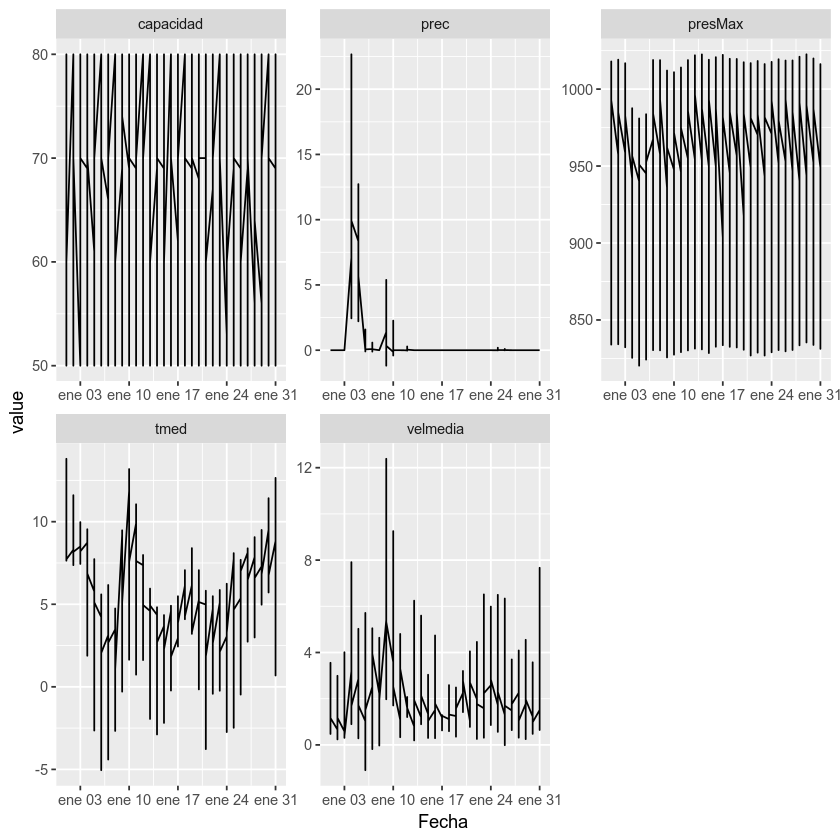

In [36]:
data |> 
  pivot_longer(cols = capacidad:presMax) |> 
  ggplot(aes(x = Fecha, y = value)) +
  geom_line() +
  facet_wrap(~name, scales = "free")

Todas las series, probablemente habría que filtrar por geografía

## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [37]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 12

In [38]:
caso <- "CU_34"
proceso <- '_12'
tarea <- "_05"
archivo <- ""
proper <- "_servicios_completo"
extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [39]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [40]:
file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
path_out <- paste0(oPath, file_save)
write_csv(data_to_save, path_out)

cat('File saved as: ')
path_out

File saved as: 

[1] "Data/Output/CU_34_12_05_servicios_completo.csv"

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [41]:
path_in <- paste0(iPath, file_save)
file.copy(path_out, path_in, overwrite = TRUE)

[1] TRUE

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Se ha realizado exploratorio de los datos del caso de uso

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos son adecuados para el caso de uso


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>